In [1]:
# Importo las librerías Necesarias 
import numpy as np  # Libreria de algebra Lineal
import matplotlib.pyplot as plt # Libreria de gráficos
plt.rc('figure', figsize=(10,7))
plt.rc('font', size=15)

# Problema 1

Se tiene una placa cuadrada de aluminio cuyos bordes están en las
condiciones que se indican en la figura: tres lados a temperaturas fijas 
y otro, el inferior, aislado térmicamente (flujo de calor igual a cero). 
Encuentre, utilizando el método de diferencias finitas, los valores de 
temperatura y flujo de calor para cada punto. Utilice primero la grilla 
señalada y luego generalice el problema a un número variable de nodos en 
cada eje de coordenadas. Haga un estudio del tiempo de cálculo en 
función del tamaño del sistema.

<center><img src="Prob 1.png"></center>

### Datos

In [2]:
Nx = 100
Ny = 100
valoresdefault = {'A':75, 'B':0, 'C':50, 'D':100}
contornodefault = {'A':'temp', 'B':'flujo', 'C':'temp', 'D':'temp',}

In [3]:
class Chapa:
    def __init__(self, Nx = 3, Ny = 3):
        self.Nx = Nx
        self.Ny = Ny
        self.Nk = Nx*Ny
        self.beta = Nx/Ny

    def makematrix(self, Tc =valoresdefault, tipcon = contornodefault):
        self.Tc = Tc
        self.tipcon = tipcon
        beta = self.beta
        Nx = self.Nx
        Ny = self.Ny
        Nk = self.Nk
        M = np.eye(Nk)
        b = np.zeros([Nk,1])
        
        for k in range(Nk):
            
            #Esquina inf-izq (A-B)
            if k == 0:
                if self.tipcon['A'] == 'temp' and self.tipcon['B'] == 'flujo':
                    b[k] = Tc['A']
                elif self.tipcon['A'] == 'flujo' and self.tipcon['B'] == 'temp':
                    b[k] = Tc['B']
                elif self.tipcon['A'] == 'temp' and self.tipcon['B'] == 'temp':
                    b[k] = (Tc['A']+Tc['B'])/2
                    
            #Esquina inf-der (B-C)
            elif k == Nx-1:
                if self.tipcon['B'] == 'temp' and self.tipcon['C'] == 'flujo':
                    b[k] = Tc['B']
                elif self.tipcon['B'] == 'flujo' and self.tipcon['C'] == 'temp':
                    b[k] = Tc['C']
                elif self.tipcon['B'] == 'temp' and self.tipcon['C'] == 'temp':
                    b[k] = (Tc['B']+Tc['C'])/2
                    
            #Esquina sup-der (C-D)
            elif k == Nk-1:
                if self.tipcon['C'] == 'temp' and self.tipcon['D'] == 'flujo':
                    b[k] = Tc['C']
                elif self.tipcon['C'] == 'flujo' and self.tipcon['D'] == 'temp':
                    b[k] = Tc['D']
                elif self.tipcon['C'] == 'temp' and self.tipcon['D'] == 'temp':
                    b[k] = (Tc['C']+Tc['D'])/2
                    
            #Esquina sup-izq (D-A)
            elif k == Nk-Nx:
                if self.tipcon['D'] == 'temp' and self.tipcon['A'] == 'flujo':
                    b[k] = Tc['D']
                elif self.tipcon['D'] == 'flujo' and self.tipcon['A'] == 'temp':
                    b[k] = Tc['A']
                elif self.tipcon['D'] == 'temp' and self.tipcon['A'] == 'temp':
                    b[k] = (Tc['D']+Tc['A'])/2
                
            #Borde izq (A)
            elif k%Nx == 0:
                if self.tipcon['A'] == 'temp':
                    b[k] = Tc['A']
                elif self.tipcon['A'] == 'flujo':
                    M[k,k] = -2*(1+(beta**2))
                    M[k,k+1] = 2
                    M[k,k+Nx] = beta**2
                    M[k,k-Nx] = beta**2
            
            #Borde inf (B)
            elif k < Nx-1:
                if self.tipcon['B'] == 'temp':
                    b[k] = Tc['B']
                elif self.tipcon['B'] == 'flujo':
                    M[k,k] = -2*(1+(beta**2))
                    M[k,k+1] = 1
                    M[k,k-1] = 1
                    M[k,k+Nx] = 2*beta**2
            
            #Borde der (C)
            elif (k+1)%Nx == 0:
                if self.tipcon['C'] == 'temp':
                    b[k] = Tc['C']
                elif self.tipcon['C'] == 'flujo':
                    M[k,k] = -2*(1+(beta**2))
                    M[k,k-1] = 2
                    M[k,k+Nx] = beta**2
                    M[k,k-Nx] = beta**2
                    
            #Borde sup (D)
            elif k > Nk-Nx-1:
                if self.tipcon['D'] == 'temp':
                    b[k] = Tc['D']
                elif self.tipcon['D'] == 'flujo':
                    M[k,k] = -2*(1+(beta**2))
                    M[k,k+1] = 1
                    M[k,k-1] = 1
                    M[k,k-Nx] = 2*beta**2
                    
            #Puntos internos
            else:
                M[k,k] = -2*(1+beta**2)
                M[k,k+1] = 1
                M[k,k-1] = 1
                M[k,k+Nx] = beta**2
                M[k,k-Nx] = beta**2
                
        self.M = M
        self.b = b
        return(M, b)

In [4]:
C = Chapa(Nx, Ny)
M, b = C.makematrix()

### Solución

In [5]:
T = np.linalg.solve(M,b)
T_mat = T.reshape(Nx,Ny)

<div style="background:#999900">metele niveles!</div>

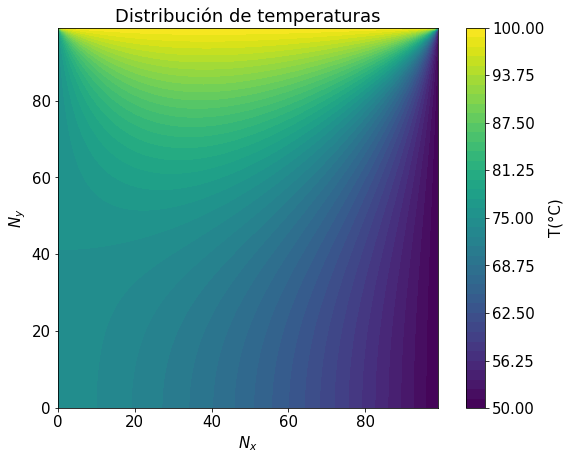

In [6]:
lvl = np.linspace(50, 100, 41)
mapable = plt.contourf(T_mat, levels=lvl)
plt.gca().set_aspect('equal')
cbar = plt.colorbar()
cbar.set_label('T(°C)')
plt.title('Distribución de temperaturas')
plt.xlabel('$N_x$')
plt.ylabel('$N_y$')
plt.show()

### Estudio del flujo

In [7]:
def getflujo (T, dx, dy):
    Qx = np.zeros_like(T)
    Qy = np.zeros_like(T)
    N = len(T)
    for k in range(N):
        #Borde izq (A)
        if k%Nx == 0:
            Qx[k] = (T[k+1]-T[k])/dx
        #Borde der (C)
        elif (k+1)%Nx == 0:
            Qx[k] = (T[k]-T[k-1])/dx
        #Puntos internos
        else:
            Qx[k] = (T[k+1]-T[k-1])/(2*dx)
            
    for k in range(N):
        #Borde inf (B)
        if k < Nx-1:
            Qy[k] = (T[k+Nx]-T[k])/dy
        #Borde sup (D)
        elif k > Nx**2-Nx-1:
            Qy[k] = (T[k]-T[k-Nx])/dy
        #Puntos internos
        else:
            Qy[k] = (T[k+Nx]-T[k-Nx])/(2*dy)

    return Qx, Qy

In [8]:
dx=1/(Nx-1)
dy=1/(Ny-1)
Qx,Qy = getflujo(T, dx, dy)

In [9]:
x = np.arange(Nx)
y = np.arange(Ny)
X, Y = np.meshgrid(x, y)
Qx_matriz = Qx.reshape(Nx, Ny)
Qy_matriz = Qy.reshape(Nx, Ny)

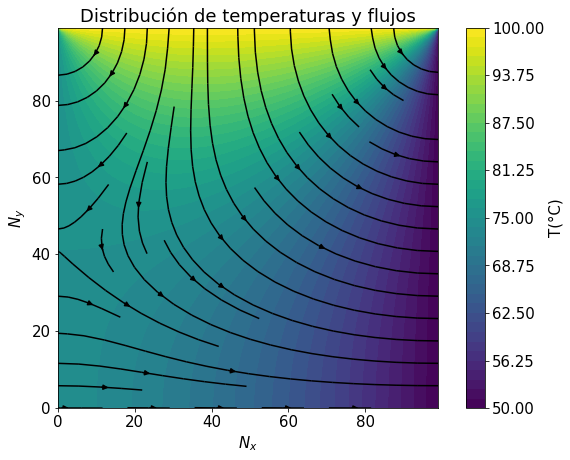

In [10]:
mapable = plt.contourf(T_mat, levels=lvl)
plt.streamplot(X, Y, -Qx_matriz, -Qy_matriz, color='k', density=0.6)
plt.gca().set_aspect('equal')
cbar = plt.colorbar(mapable)
cbar.set_label('T(°C)')
plt.title('Distribución de temperaturas y flujos')
plt.xlabel('$N_x$')
plt.ylabel('$N_y$')
plt.axis([0, Nx-1, 0, Ny-1])
plt.show()

<div style="background:#999900">esta bien! Faltó la parte de hacer el escaleo.</div>